<a href="https://colab.research.google.com/github/himanshushukla12/Data_Visualization/blob/main/assignment4/2022H1030107P_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from nsepython import index_total_returns
import plotly.express as px

In [18]:
try:
    nifty50_data = index_total_returns(symbol="NIFTY 50", start_date="01-May-2014", end_date="10-Sep-2023")
    niftybank_data = index_total_returns(symbol="NIFTY BANK", start_date="01-May-2014", end_date="10-Sep-2023")
    niftyit_data = index_total_returns(symbol="NIFTY IT", start_date="01-May-2014", end_date="10-Sep-2023")
except Exception as e:
    print("An error occurred during data retrieval:", str(e))

In [19]:
df = pd.DataFrame(niftybank_data)
df.to_csv("niftybank_data.csv", index=False)
df = pd.DataFrame(nifty50_data)
df.to_csv("nifty50.csv", index=False)
df = pd.DataFrame(niftyit_data)
df.to_csv("niftyita_dat.csv", index=False)

In [20]:
# Load the uploaded CSV files into DataFrames
nifty_50_data = pd.read_csv('nifty50.csv')
nifty_bank_data = pd.read_csv('niftybank_data.csv')
nifty_it_data = pd.read_csv('niftyita_dat.csv')

# Show the first few rows of each DataFrame to confirm the structure
nifty_50_data_head = nifty_50_data.head()
nifty_bank_data_head = nifty_bank_data.head()
nifty_it_data_head = nifty_it_data.head()

nifty_50_data_head, nifty_bank_data_head, nifty_it_data_head


(             Index Name         Date  TotalReturnsIndex
 0  NIFTY INFRASTRUCTURE  30 Sep 2020            3816.49
 1  NIFTY INFRASTRUCTURE  29 Sep 2020            3839.76
 2  NIFTY INFRASTRUCTURE  28 Sep 2020            3854.11
 3  NIFTY INFRASTRUCTURE  25 Sep 2020            3777.90
 4  NIFTY INFRASTRUCTURE  24 Sep 2020            3667.04,
    Index Name         Date  TotalReturnsIndex
 0  NIFTY BANK  08 Sep 2023           61924.86
 1  NIFTY BANK  07 Sep 2023           61543.56
 2  NIFTY BANK  06 Sep 2023           60900.04
 3  NIFTY BANK  05 Sep 2023           61068.84
 4  NIFTY BANK  04 Sep 2023           61132.07,
   Index Name         Date  TotalReturnsIndex
 0   NIFTY IT  08 Sep 2023           43920.47
 1   NIFTY IT  07 Sep 2023           43964.79
 2   NIFTY IT  06 Sep 2023           43780.45
 3   NIFTY IT  05 Sep 2023           43852.28
 4   NIFTY IT  04 Sep 2023           43579.42)

In [21]:
def compute_relative_percent_change(df):
    start_value = df['TotalReturnsIndex'].iloc[0]  # Taking the first value as the start value (oldest date)
    df['RelativePercentChange'] = 100 * (df['TotalReturnsIndex'] - start_value) / start_value
    return df

# Compute relative percent change for each index
nifty_50_data = compute_relative_percent_change(nifty_50_data)
nifty_bank_data = compute_relative_percent_change(nifty_bank_data)
nifty_it_data = compute_relative_percent_change(nifty_it_data)

# Show the first few rows of each DataFrame after computing relative percent change
nifty_50_data_head_updated = nifty_50_data.head()
nifty_bank_data_head_updated = nifty_bank_data.head()
nifty_it_data_head_updated = nifty_it_data.head()

nifty_50_data_head_updated, nifty_bank_data_head_updated, nifty_it_data_head_updated


(             Index Name         Date  TotalReturnsIndex  RelativePercentChange
 0  NIFTY INFRASTRUCTURE  30 Sep 2020            3816.49               0.000000
 1  NIFTY INFRASTRUCTURE  29 Sep 2020            3839.76               0.609723
 2  NIFTY INFRASTRUCTURE  28 Sep 2020            3854.11               0.985722
 3  NIFTY INFRASTRUCTURE  25 Sep 2020            3777.90              -1.011139
 4  NIFTY INFRASTRUCTURE  24 Sep 2020            3667.04              -3.915902,
    Index Name         Date  TotalReturnsIndex  RelativePercentChange
 0  NIFTY BANK  08 Sep 2023           61924.86               0.000000
 1  NIFTY BANK  07 Sep 2023           61543.56              -0.615746
 2  NIFTY BANK  06 Sep 2023           60900.04              -1.654941
 3  NIFTY BANK  05 Sep 2023           61068.84              -1.382353
 4  NIFTY BANK  04 Sep 2023           61132.07              -1.280245,
   Index Name         Date  TotalReturnsIndex  RelativePercentChange
 0   NIFTY IT  08 Sep 2023   

In [22]:
print(nifty_50_data.columns)
print(nifty_bank_data.columns)
print(nifty_it_data.columns)


Index(['Index Name', 'Date', 'TotalReturnsIndex', 'RelativePercentChange'], dtype='object')
Index(['Index Name', 'Date', 'TotalReturnsIndex', 'RelativePercentChange'], dtype='object')
Index(['Index Name', 'Date', 'TotalReturnsIndex', 'RelativePercentChange'], dtype='object')


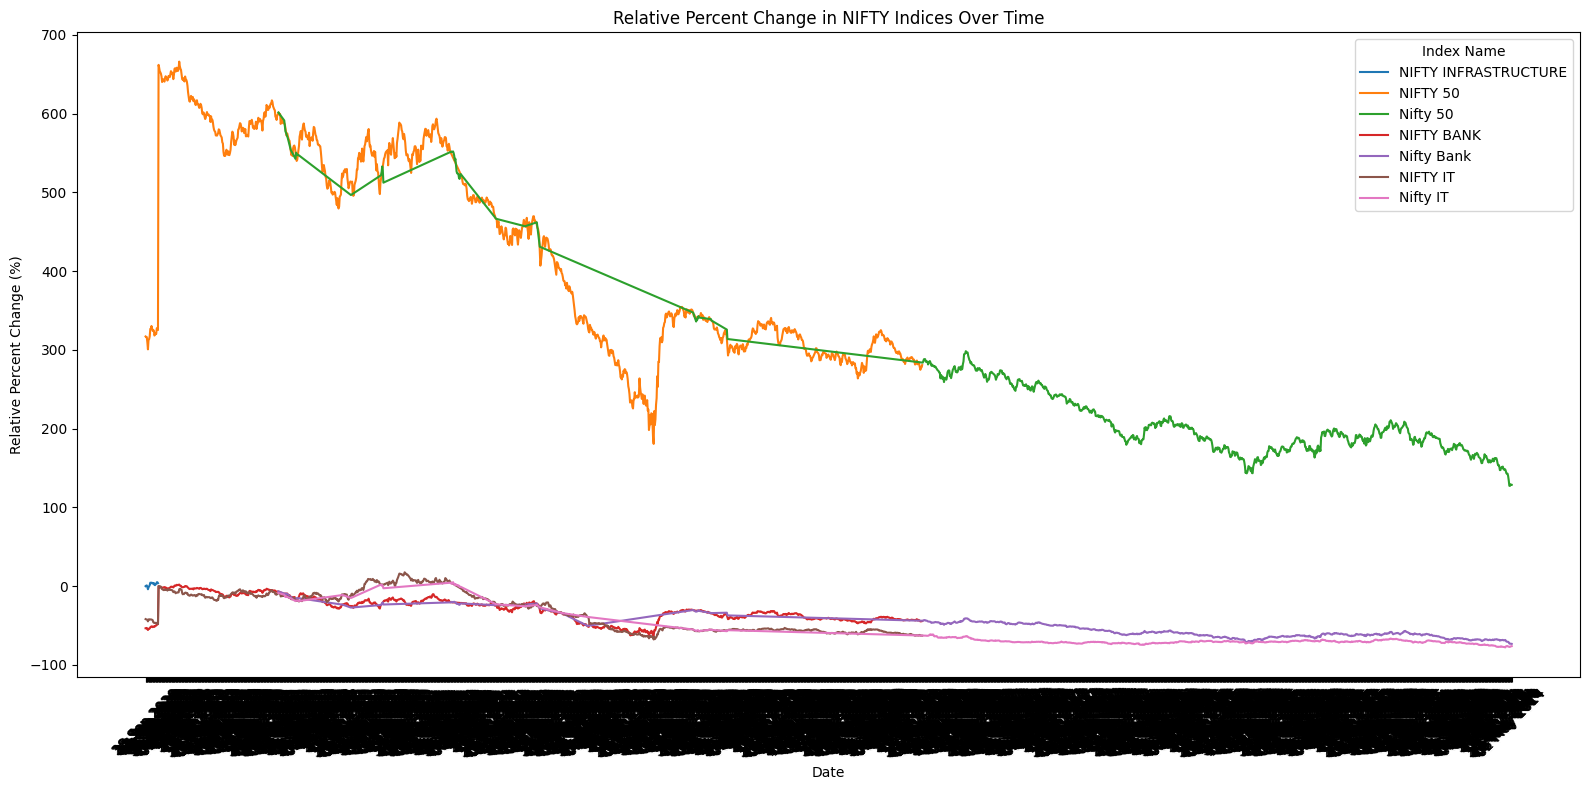

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the relative percent change for each index
nifty_50_data["NIFTY_50_RelativePercentChange"] = (nifty_50_data["TotalReturnsIndex"] - nifty_50_data["TotalReturnsIndex"].iloc[0]) / nifty_50_data["TotalReturnsIndex"].iloc[0] * 100
nifty_bank_data["NIFTY_BANK_RelativePercentChange"] = (nifty_bank_data["TotalReturnsIndex"] - nifty_bank_data["TotalReturnsIndex"].iloc[0]) / nifty_bank_data["TotalReturnsIndex"].iloc[0] * 100
nifty_it_data["NIFTY_IT_RelativePercentChange"] = (nifty_it_data["TotalReturnsIndex"] - nifty_it_data["TotalReturnsIndex"].iloc[0]) / nifty_it_data["TotalReturnsIndex"].iloc[0] * 100

# Reshape the DataFrame for Seaborn plotting
melted_data = pd.concat([
    nifty_50_data[['Date', 'NIFTY_50_RelativePercentChange', 'Index Name']].rename(columns={'NIFTY_50_RelativePercentChange': 'RelativePercentChange'}),
    nifty_bank_data[['Date', 'NIFTY_BANK_RelativePercentChange', 'Index Name']].rename(columns={'NIFTY_BANK_RelativePercentChange': 'RelativePercentChange'}),
    nifty_it_data[['Date', 'NIFTY_IT_RelativePercentChange', 'Index Name']].rename(columns={'NIFTY_IT_RelativePercentChange': 'RelativePercentChange'}),
], axis=0)

# Create a line plot using Seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(data=melted_data, x='Date', y='RelativePercentChange', hue='Index Name')

# Add titles and labels
plt.title('Relative Percent Change in NIFTY Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Percent Change (%)')
plt.legend(title='Index Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
